<a href="https://colab.research.google.com/github/sapana27/Machine-Learning-projects/blob/main/Heart_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  !pip install --upgrade scikit-learn
import pandas as pd #to load and manipulate data and for One-Hot Encoding
import numpy as np #to calculate mean and standard deviation
import matplotlib.pyplot as plt # to draw graphs
from sklearn.tree import DecisionTreeClassifier #to bulid a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split #to split data into training and testing sets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix #to create a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay  #to draw a confusion matrix
import tree

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
data=pd.read_csv(url, header=None)
print(data.head())

     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0


In [3]:
data.columns=['age',
           'sex',
           'cp',
           'restbps',
           'chol',
           'fbs',
           'restecg',
           'thalach',
           'exang',
           'oldpeak',
           'slope',
           'ca',
           'thal',
           'hd']
data.head()



,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
data.dtypes

age        float64
sex        float64
cp         float64
restbps    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [5]:
data['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [6]:
data['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [7]:
len(data)

303

In [8]:

data.loc[(data['thal']=='?') | (data['ca']=='?')]


,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [9]:
data_no_missing=data.loc[(data['thal'] != '?')&(data['ca'] != '?')]
len(data_no_missing)

297

In [10]:
data_no_missing.dtypes

age        float64
sex        float64
cp         float64
restbps    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [11]:
data_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [12]:
X=data_no_missing.drop('hd', axis=1).copy()
X.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [13]:
y=data_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [14]:
y.unique()

array([0, 2, 1, 3, 4])

In [15]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [16]:
X['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [17]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,True,False,False,False
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,False,False,False,True
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,False,False,True,False
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,False,True,False,False


In [18]:
X_encoded=pd.get_dummies(X, columns=['cp','thal','restecg','slope'])
X_encoded.head()

,age,sex,restbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,thal_3.0,thal_6.0,thal_7.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,True,False,False,False,True,False,False,True
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,True,False,False,False,False,True,False,True,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,False,True,False,True,False
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,True,False,False,False,False,True
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,True,False,False,False,False,True,True,False,False


In [19]:
y.unique()

array([0, 2, 1, 3, 4])

In [20]:
y_not_zero_index=y>0
y[y_not_zero_index]=1
y.unique()

array([0, 1])

In [21]:
X_train,X_test, y_train, y_test=train_test_split(X_encoded, y, random_state=42)
# create decision tree and fit it into training dataset
clf_data=DecisionTreeClassifier(random_state=42)
# train the classifier (clf.data)
clf_data=clf_data.fit(X_train, y_train)

[Text(0.5603448275862069, 0.9545454545454546, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.3232758620689655, 0.8636363636363636, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.2025862068965517, 0.7727272727272727, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(0.12931034482758622, 0.6818181818181818, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.06896551724137931, 0.5909090909090909, 'thalach <= 125.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No HD'),
 Text(0.034482758620689655, 0.5, 'restecg_0.0 <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = No HD'),
 Text(0.017241379310344827, 0.4090909090909091, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No HD'),
 Text(0.05172413793103448, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes HD'),
 Text(0.10344827586206896, 0.5, 'restbps <= 

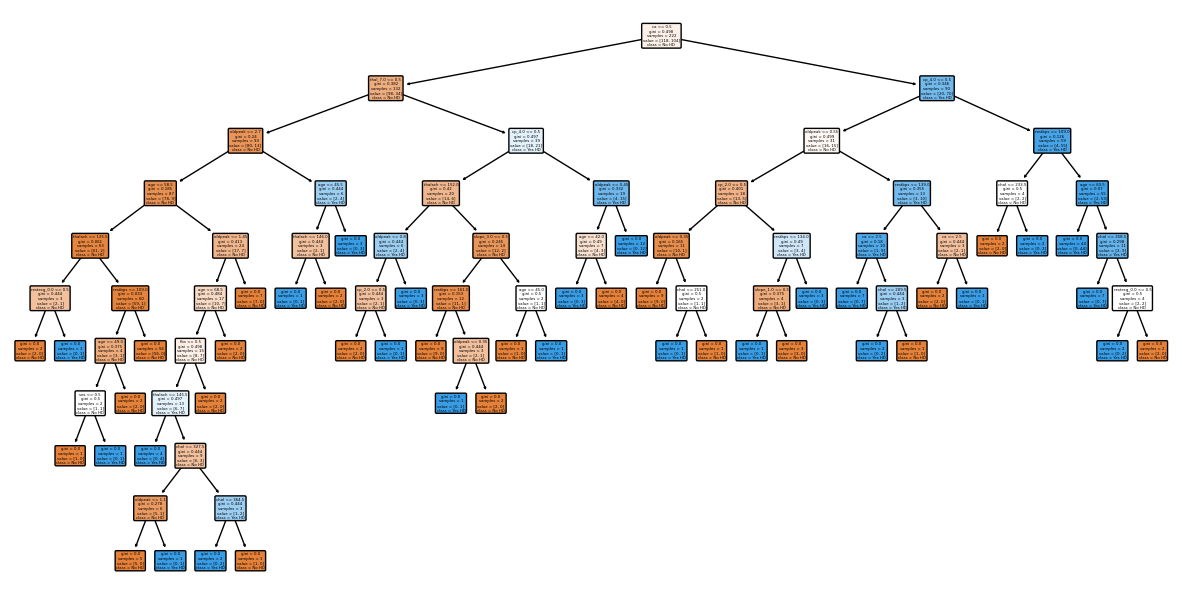

In [22]:
plt.figure(figsize=(15, 7.5))
# figure.set_dpi(100)
plot_tree(clf_data,
         filled=True,
         rounded=True,
         class_names=['No HD','Yes HD'],
         feature_names=X_encoded.columns)


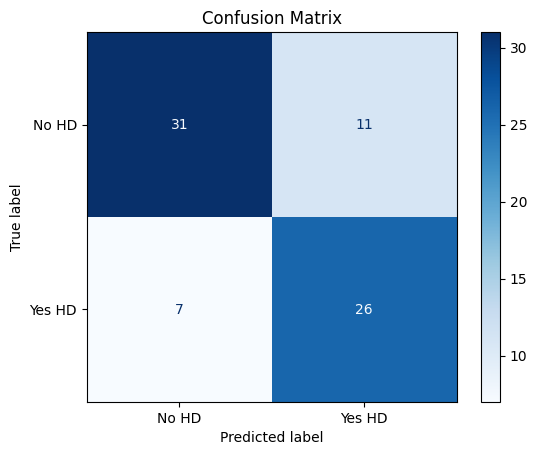

In [23]:
# plot_confusion_matrix(clf_data, X_test, y_test, display_lables=['No HD','Yes HD'])

# make predictions on the test set(X_test)
# clf.data.fit(X_train, y_train)
y_predict=clf_data.predict(X_test)

# generate the confusion matrix
cm=confusion_matrix(y_test, y_predict)

# display the confusion matrix
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No HD','Yes HD'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [24]:
path=clf_data.cost_complexity_pruning_path(X_train, y_train) #determine values for alpha
ccp_alphas=path.ccp_alphas #execute different values for alpha
ccp_path=ccp_alphas[:-1]#exclude the maximum value for alpha

clf_dts= [] #create an array that we will put decision trees into

#create one decisin tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
  clf_data=DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf_data.fit(X_train, y_train)
  clf_dts.append(clf_data)


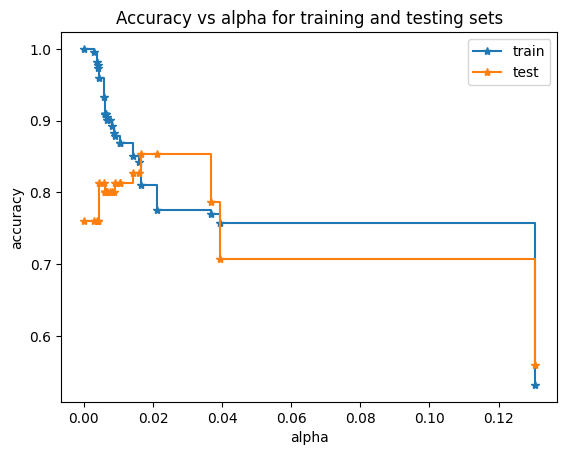

In [25]:
train_scores= [clf_data.score(X_train, y_train) for clf_data in clf_dts]
test_scores= [clf_data.score(X_test, y_test) for clf_data in clf_dts]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="*", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="*", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


In [26]:
# Choose optimal alpha (e.g., 0.02) based on the graph
optimal_alpha = 0.02
clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
clf_pruned.fit(X_train, y_train)

# Evaluate pruned model
train_accuracy = clf_pruned.score(X_train, y_train)
test_accuracy = clf_pruned.score(X_test, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.8108108108108109
Test Accuracy: 0.8533333333333334


This is pretty good evaluation by model

[Text(0.5, 0.875, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.25, 0.625, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.125, 0.375, 'gini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(0.375, 0.375, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Yes HD'),
 Text(0.25, 0.125, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No HD'),
 Text(0.5, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Yes HD'),
 Text(0.75, 0.625, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes HD'),
 Text(0.625, 0.375, 'gini = 0.499\nsamples = 31\nvalue = [16, 15]\nclass = No HD'),
 Text(0.875, 0.375, 'gini = 0.126\nsamples = 59\nvalue = [4, 55]\nclass = Yes HD')]

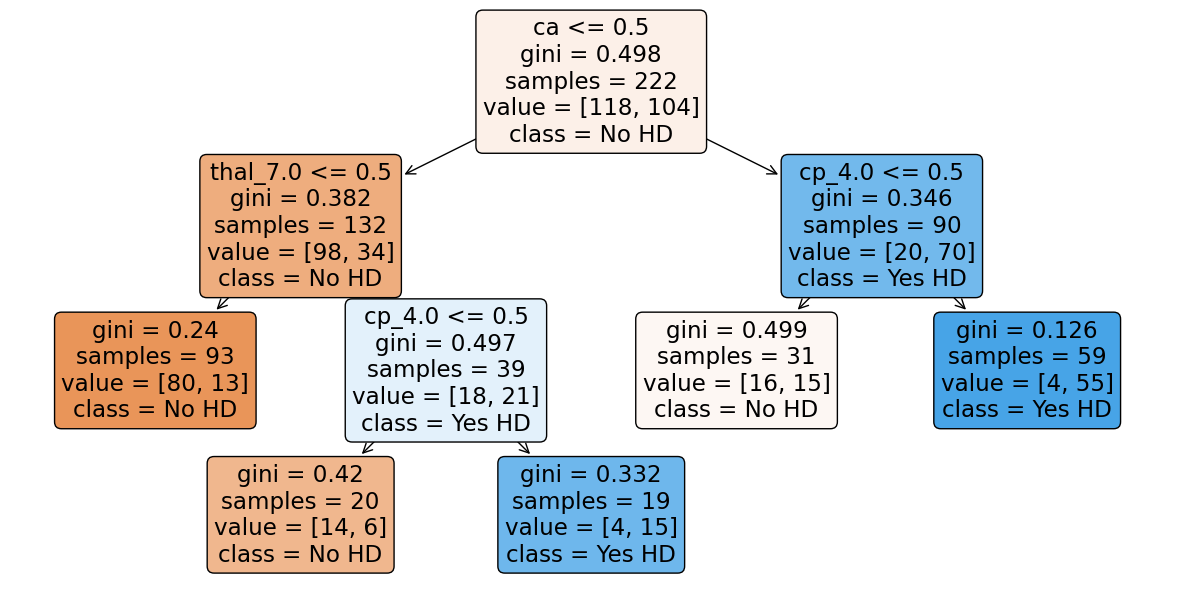

In [27]:
plt.figure(figsize=(15, 7.5))
# figure.set_dpi(100)
plot_tree(clf_pruned,
         filled=True,
         rounded=True,
         class_names=['No HD','Yes HD'],
         feature_names=X_encoded.columns)


In [28]:
y_predict=clf_pruned.predict(X_test)

cm=confusion_matrix(y_test, y_predict)



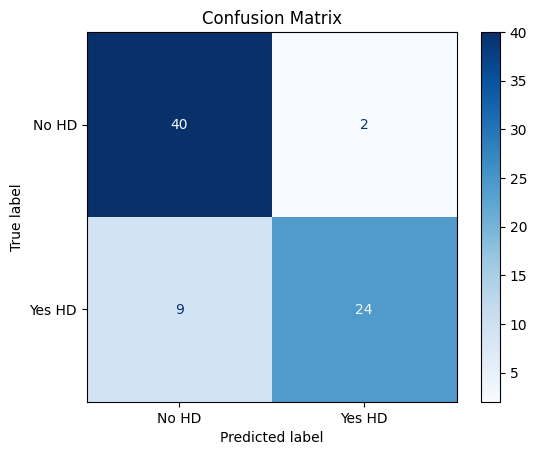

In [29]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No HD', 'Yes HD'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [30]:
# !git clone https://github.com/sapana27/Machine-Learning-projects.git
# %cd Machine-Learning-projects
# !cp https://colab.research.google.com/drive/1Z-Fn4xqcFPBP8QRE6sYFzSP_BX1RtgvF?usp=drive_link
# !git add .
# !git commit -m "used cost complexity pruning"
# !git push origin main


In [31]:
# cp
